In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")

In [10]:
# Display the first few rows
print("Train Dataset Head:")
print(train_df.head())

print("\nTest Dataset Head:")
print(test_df.head())

Train Dataset Head:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   783  label  
0  0.0    5.0  
1  0.0    0.0  
2  0.0    4.0  
3  0.0    1.0  
4  0.0    9.0  

[5 rows x 785 columns]

Test Dataset Head:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...   

In [11]:
# Display dataset summary statistics
print("\nTrain Dataset Description:")
print(train_df.describe())

print("\nTest Dataset Description:")
print(test_df.describe())


Train Dataset Description:
             0        1        2        3        4        5        6        7  \
count  13186.0  13186.0  13186.0  13186.0  13186.0  13186.0  13186.0  13186.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

             8        9  ...           775           776           777  \
count  13186.0  13186.0  ...  13185.000000  13185.000000  13185.000000   
mean       0.0      0.0  ...      0.106333      0.064543      0.045355   
std        0.0      

In [12]:
# Check for missing values
print("Missing values in train dataset:\n", train_df.isnull().sum().sum())
print("Missing values in test dataset:\n", test_df.isnull().sum().sum())

# Separate features and labels
X_train = train_df.iloc[:, :-1].values  # All columns except the last (features)
y_train = train_df.iloc[:, -1].values   # Last column (labels)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to integers (if needed)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("Preprocessing complete. Data is ready for model training.")

Missing values in train dataset:
 180
Missing values in test dataset:
 0
Preprocessing complete. Data is ready for model training.


<ipython-input-12-47a3852de115>:17: RuntimeWarning: invalid value encountered in cast
  y_train = y_train.astype(int)


In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can use "median" or "most_frequent" as well
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9095
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.91      0.88      0.90      1032
           3       0.89      0.89      0.89      1010
           4       0.91      0.92      0.91       982
           5       0.88      0.86      0.87       892
           6       0.92      0.94      0.93       958
           7       0.91      0.91      0.91      1028
           8       0.86      0.87      0.87       974
           9       0.89      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



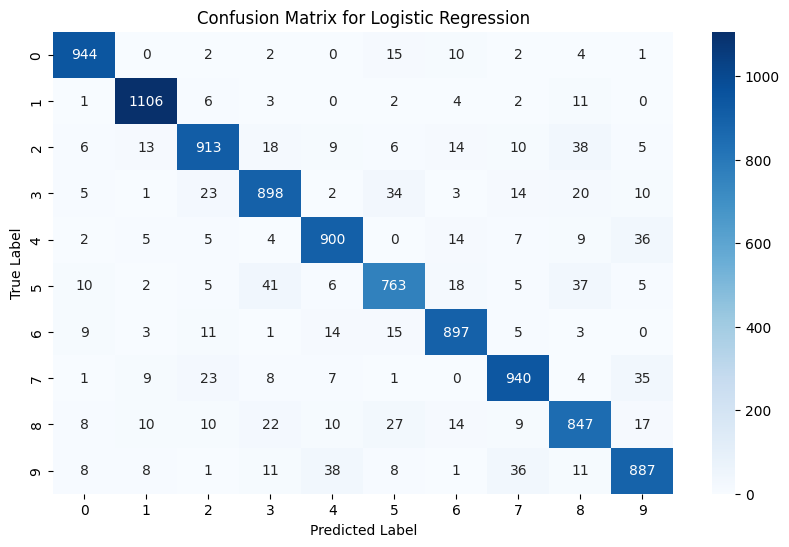

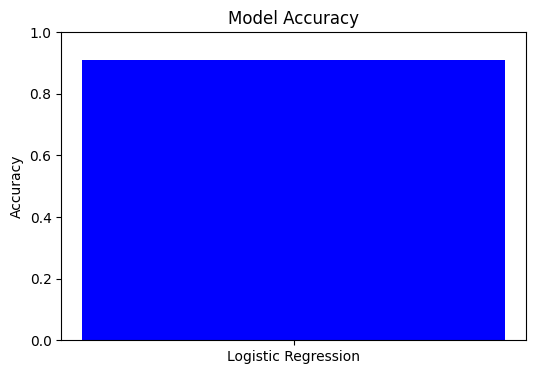

In [15]:
#Train Logistic Regression on MNIST
# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', n_jobs=-1)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Plot accuracy as a bar graph
plt.figure(figsize=(6, 4))
plt.bar(["Logistic Regression"], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()


KNN Accuracy: 0.9510
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.97      0.93      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.97      0.94      0.95       982
           5       0.96      0.94      0.95       892
           6       0.96      0.99      0.97       958
           7       0.94      0.94      0.94      1028
           8       0.98      0.89      0.93       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



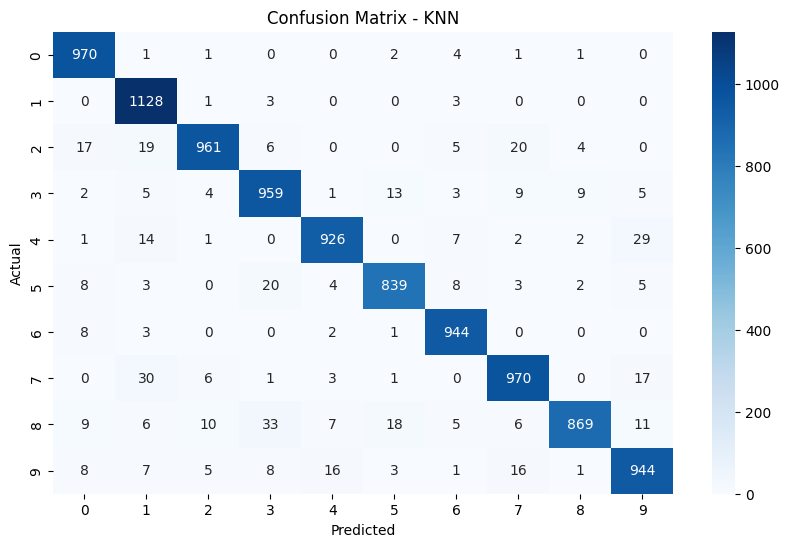

In [16]:
#K-Nearest Neighbors (KNN) for MNIST classification

# Initialize and train KNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


Decision Tree Accuracy: 0.8255
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       980
           1       0.93      0.94      0.93      1135
           2       0.80      0.78      0.79      1032
           3       0.79      0.79      0.79      1010
           4       0.82      0.82      0.82       982
           5       0.79      0.77      0.78       892
           6       0.85      0.83      0.84       958
           7       0.84      0.87      0.85      1028
           8       0.76      0.73      0.74       974
           9       0.78      0.81      0.79      1009

    accuracy                           0.83     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.83      0.82     10000



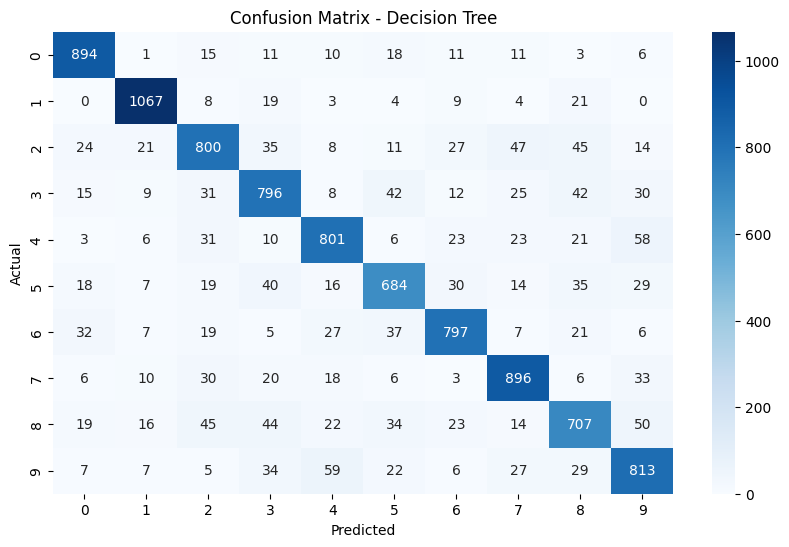

In [17]:
#Decision Tree for MNIST Classification
# Initialize and train Decision Tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Naïve Bayes Accuracy: 0.5669
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.77       980
           1       0.71      0.96      0.82      1135
           2       0.90      0.30      0.45      1032
           3       0.71      0.37      0.49      1010
           4       0.83      0.12      0.21       982
           5       0.62      0.10      0.18       892
           6       0.67      0.91      0.77       958
           7       0.87      0.37      0.52      1028
           8       0.32      0.60      0.42       974
           9       0.40      0.93      0.56      1009

    accuracy                           0.57     10000
   macro avg       0.67      0.56      0.52     10000
weighted avg       0.67      0.57      0.52     10000



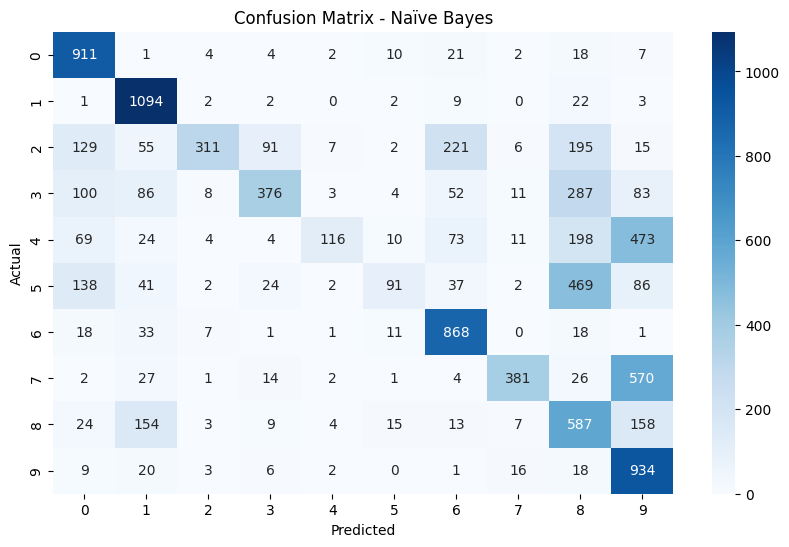

In [18]:
#Naïve Bayes for MNIST Classification
# Initialize and train Naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naïve Bayes Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9596
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.95      0.96      0.96       982
           5       0.97      0.94      0.95       892
           6       0.96      0.96      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



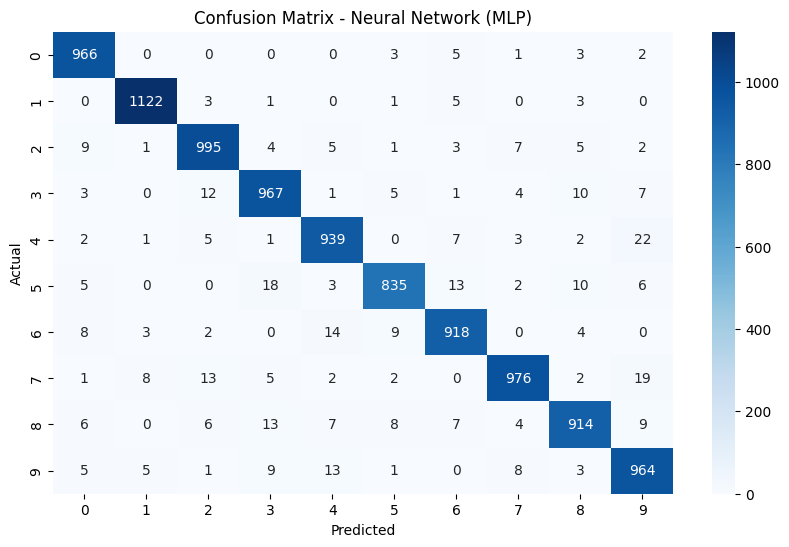

In [19]:
#Neural Network (MLP) for MNIST Classification
# Initialize and train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=20, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network (MLP)")
plt.show()


Random Forest Accuracy: 0.9539
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.95      0.95       982
           5       0.96      0.94      0.95       892
           6       0.95      0.97      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.93      0.94       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



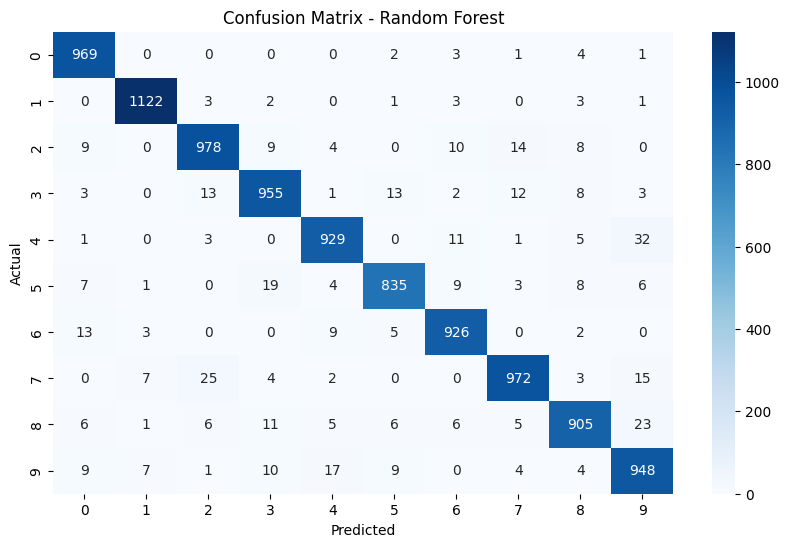

In [20]:
#Random Forest for MNIST Classification
# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()



Hyperparameter tuning for Logistic Regression...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters for Logistic Regression: {'C': 0.1}
Logistic Regression Best Accuracy: 0.9116

Hyperparameter tuning for KNN...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN: {'n_neighbors': 3}
KNN Best Accuracy: 0.9463

Hyperparameter tuning for Decision Tree...
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Decision Tree: {'max_depth': 10}
Decision Tree Best Accuracy: 0.8098

Hyperparameter tuning for Naive Bayes...
Naive Bayes Best Accuracy: 0.5738

Hyperparameter tuning for Random Forest...
Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 100, 'max_depth': 20}
Random Forest Best Accuracy: 0.9524


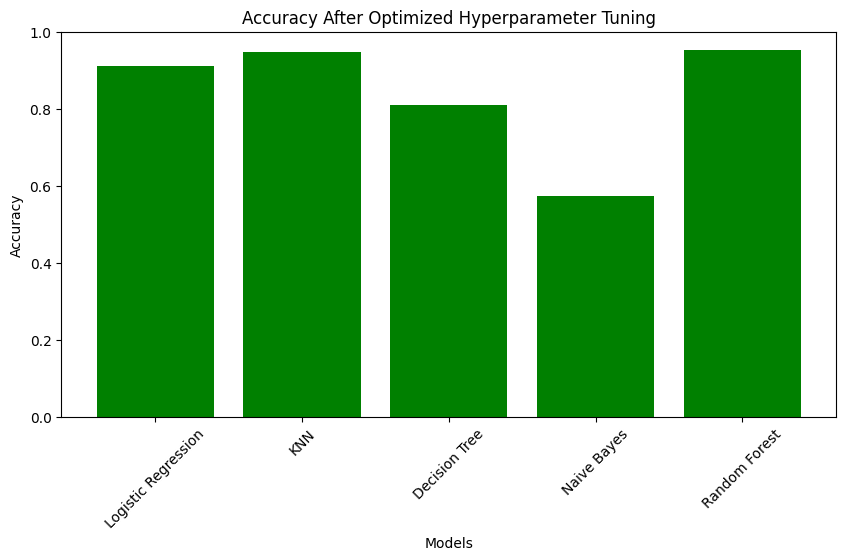

In [21]:
# Hyperparameter tuning
# Use only 10,000 training samples to speed up computation
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class='multinomial', n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),  # No tuning needed
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1)
}

# Define reduced hyperparameter grid
param_grids = {
    "Logistic Regression": {"C": [0.1, 1]},
    "KNN": {"n_neighbors": [3, 5]},
    "Decision Tree": {"max_depth": [10, 20]},
    "Naive Bayes": {},  # No tuning needed
    "Random Forest": {"n_estimators": [50, 100], "max_depth": [10, 20]}
}

# Hyperparameter tuning using RandomizedSearchCV (faster than GridSearchCV)
best_models = {}
best_accuracies = {}

for name, model in models.items():
    print(f"\nHyperparameter tuning for {name}...")

    # Apply RandomizedSearchCV only if hyperparameters exist
    if param_grids[name]:
        grid_search = RandomizedSearchCV(model, param_distributions=param_grids[name],
                                         n_iter=5, cv=2, scoring="accuracy", n_jobs=-1, verbose=1)
        grid_search.fit(X_train_small, y_train_small)  # Train on smaller dataset
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        best_model = model.fit(X_train_small, y_train_small)  # No tuning for Naïve Bayes

    # Predictions and accuracy evaluation
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Store best model and accuracy
    best_models[name] = best_model
    best_accuracies[name] = acc
    print(f"{name} Best Accuracy: {acc:.4f}")

# Plot accuracy comparison after tuning
plt.figure(figsize=(10, 5))
plt.bar(best_accuracies.keys(), best_accuracies.values(), color='green')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy After Optimized Hyperparameter Tuning")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


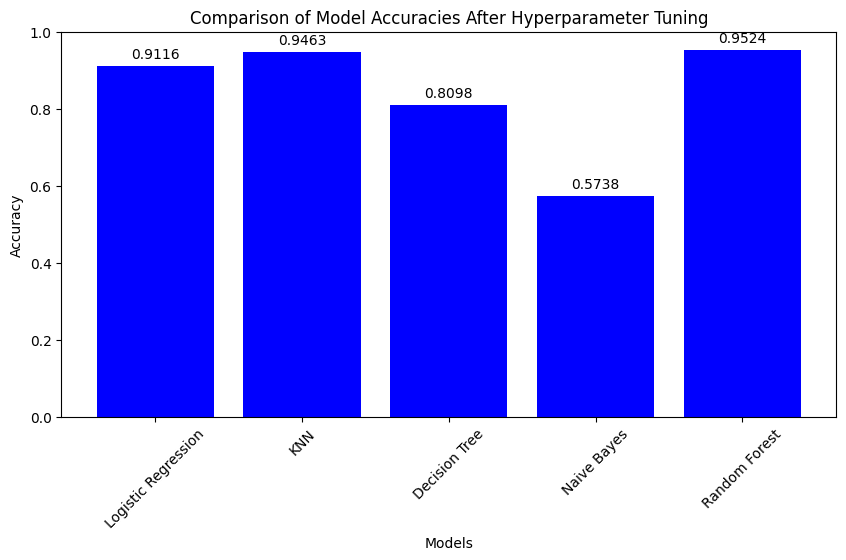

In [22]:
# Plot accuracy comparison after tuning (no redundant imports)
plt.figure(figsize=(10, 5))
plt.bar(best_accuracies.keys(), best_accuracies.values(), color='blue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies After Hyperparameter Tuning")
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Display values on bars
for i, v in enumerate(best_accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=10)

plt.show()


In [23]:
# Find the model with the highest accuracy
best_model_name = max(best_accuracies, key=best_accuracies.get)
best_model_accuracy = best_accuracies[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


The best model is: Random Forest with an accuracy of 0.9524
